Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import itertools as it
import spacy
from spacy.lang.hi import Hindi
import regex as re
nlp_hi = Hindi()


In [ ]:
extended_stop_words = ['जी','श्री','|','l','श्रीमती']
for stopword in extended_stop_words:
    lexeme = nlp_hi.vocab[stopword]
    lexeme.is_stop = True

In [ ]:
def preprocessing_hi(text_hi):
  tweet_hi = []
  tokenized_text = nlp_hi(text_hi)
  for token in tokenized_text:
    if(token.text!='\n\n'
        and not token.is_stop
        and not token.is_punct
        and not token.is_space
        and not token.like_email
        and not token.is_digit
        and not token.is_quote
        and (re.search(r'@\S+',token.text) is None)
        and not token.like_url):
      tweet_hi.append(token.text)


  tweet = ' '.join([token  for token in tweet_hi])
  return tweet

In [ ]:
df=pd.read_csv('tweetSet.csv')
x=df['Tweets'].tolist()

In [ ]:
p=[]
for tweets in x:
  p.append(preprocessing_hi(tweets))

In [ ]:
! pip install demoji
import demoji
demoji.download_codes()
pt=[]
for tweet in p:
  tweet=tweet.replace('\\n','')
  tweet=tweet.replace('#','')
  tweet=demoji.replace(tweet,'')
  pt.append(tweet)

<ipython-input-161-210ebffc91d4>:3: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [ ]:
xa=np.array(pt)
print(xa.shape)

(1001,)


In [ ]:
y=[]
for tweet in df['Sentiment']:
  if(tweet == 'positive'):
    y.append(1)
  if(tweet == 'negative'):
    y.append(-1)
  if(tweet == 'neutral'):
    y.append(0)

In [ ]:
ya=np.array(y)
print(ya.shape)

(1001,)


In [ ]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences

Naive Bayes Classifier

In [ ]:
from sklearn.model_selection import train_test_split
xa_train,xa_test,ya_train,ya_test=train_test_split(xa,ya,test_size=0.2,random_state=5)
print(xa_train.shape)
print(xa_test.shape)
print(ya_train.shape)
print(ya_test.shape)

(800,)
(201,)
(800,)
(201,)


In [ ]:
tokenizer = Tokenizer(num_words=None,split=' ',lower=True)
tokenizer.fit_on_texts(xa_train)
integer_sentences_train = tokenizer.texts_to_sequences(xa_train)
data_train = pad_sequences(integer_sentences_train,padding='post',truncating='post',value=0.)
print(data_train[0])
print(data_train.shape)

[1224 1225  630  234 1226   65  853  170 1227   90 1228 1229   50 1230
  630    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0]
(800, 42)


In [ ]:
tokenizer.fit_on_texts(xa_test)
integer_sentences_test = tokenizer.texts_to_sequences(xa_test)
data_test = pad_sequences(integer_sentences_test,padding='post',truncating='post',value=0.)
print(data_test[0])
print(data_test.shape)

[ 305  264   13   27 5603 5604 5605  902 5606 5607 5608 5609 5610 5611
 5612    2    2   67    5   92    2  231  428  583 5613 5614 5615 5616
 5617  459    0    0    0    0    0    0    0    0    0    0]
(201, 40)


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
data_train = sequence.pad_sequences(data_train, maxlen=30, dtype='float32')
data_test = sequence.pad_sequences(data_test, maxlen=30, dtype='float32')
print(data_train.shape)
print(data_test.shape)

(800, 30)
(201, 30)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(data_train, ya_train)
y_pred = clf.predict(data_test)
from sklearn import metrics
acc=metrics.accuracy_score(ya_test, y_pred)*100
print("Accuracy:",acc)

Accuracy: 47.76119402985074


In [ ]:
# with open(model_pkl_file, 'rb') as file:
#     model = pickle.load(file)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ya_test, y_pred, labels=[1,-1 ,0])

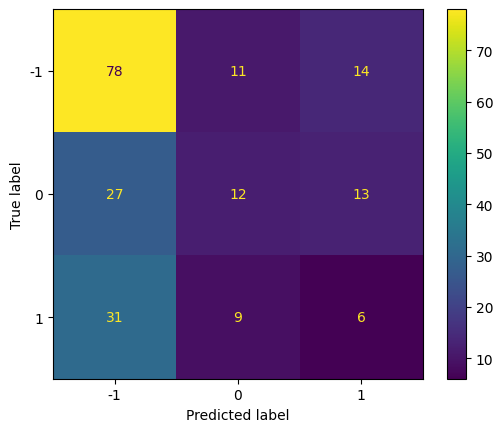

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "nb_model" + str(acc) + ".pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(clf, file)

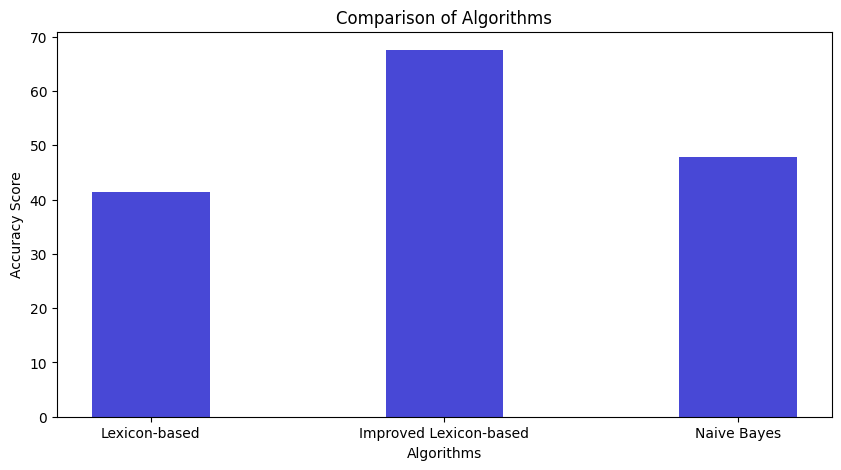

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
color = (0.1, # redness
         0.1, # greenness
         0.8, # blueness
         0.8 # transparency
         )
# creating the dataset
data = {'Lexicon-based':41.45, 'Improved Lexicon-based':67.53, 'Naive Bayes':47.76}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color =color,
        width = 0.4)

plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Algorithms")
plt.show()

In [191]:
ya_test

array([ 0, -1, -1, -1,  1,  0,  0,  1,  1,  1,  1, -1,  0, -1,  1,  1,  1,
        0,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  0,  1,  1,  1,  1,  0,
       -1,  1,  0,  0,  1,  0, -1,  0,  1, -1,  1,  1,  1,  1,  1,  0,  1,
        1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  0,  0,  1, -1,  1,  1, -1,
        0,  1, -1,  1,  1, -1,  0,  1,  1, -1,  1,  1,  1, -1,  1,  0,  0,
        0,  0, -1,  1,  1,  1,  1,  0,  0,  1,  1,  1, -1,  1, -1, -1, -1,
        1, -1, -1,  0, -1,  1,  1,  0, -1, -1, -1,  0,  1, -1,  1, -1, -1,
       -1,  0,  0,  0,  1,  1, -1,  1,  1,  1,  0,  1,  0,  0,  0,  1, -1,
       -1,  1,  1, -1, -1,  1,  1,  1,  0,  0,  0,  1,  1,  0,  1, -1,  0,
        1,  1,  1, -1,  1,  1,  0,  0,  1,  1, -1, -1,  0,  1,  1,  1, -1,
        0,  1,  1, -1, -1,  1,  1,  1,  1,  0, -1,  0,  0,  1,  1, -1,  1,
        0,  1,  1, -1,  1,  0, -1, -1,  1, -1,  1,  1,  1,  1])

In [193]:
xa_test

array(['संक्रमण हमें क्या चाहिए?(कोरोनापासून लहान मुलांचा बचाव कसा कराल आणि काळजी कशी घ्याल Blog कोरोना कोरोना_काल_देश_बेहाल कोरोना_हारेगा_जीतेगा_हिंदुस्तान blogger Blogs blogpost BLOGOS bloggingtips CoronavirusIndia',
       'निरोध विरोध हॉस्पिटल मांग चमचे जबकि साल उन्ही आकाओं हुकूमत हद जबतक जनसंख्या नियंत्रण नही तबतक सरकार बनाकर आ जाये हॉस्पिटल छोड़ो लाई चबैना नही अटा पायेगा।कोरोना',
       'मोदी रहिए क्युकी राजनेता बनना टिकट चाहिए,मोदी देश लोगो जात लड़ाने कोसिस जिसकी सजा जनता अब पूरे बीजेपी देगी मोदी नाम अब ठंडा पड़ने लगा मोदी समय अब खत्म वाला अब देश लोगो तन_मन_धन बात नही सुननी',
       'बीजेपी सेना सवाल उठाते विपक्ष नाते अब वोही सवाल कांग्रेस उठाए तोह सेना अपमान अगर सेना सवाल उठाना गलत तोह मोदी माफी मांगे क्युकी साल विपक्ष रहने कारण बोहोत सवाल उठाए बीजेपी',
       'जीते अस्पताल दवा निदान नहीं,मरणोपरांत शमशान नहीं।उत्तमस्वास्थ्य कोरोना_संक्रमण बीजेपीमोदी_मतलब_देश_चौपट',
       'कानपुर पिछले दिनों कोरोना टेस्ट पॉजिटिविटी औसत ८% पहुंच गई बीते दिनों अप्रैल औसत २०% अधिक रही मृत्यु हों च

In [209]:
# df3 = pd.concat([df,df2], axis=1)
# df3 = pd.concat([xa_test,ya_test,y_pred], axis=1)

df_x = pd.DataFrame(xa_test, columns=['Preprocessed_Tweets'])
df_y_test = pd.DataFrame(ya_test, columns=['Actual_Sentiment'])
df__y_pred = pd.DataFrame(y_pred, columns=['Predicted_Sentiment'])
df3 = pd.concat([df_x,df__y_pred,df_y_test], axis=1)
df4=df3.sample(n=10)
df4

,Preprocessed_Tweets,Predicted_Sentiment,Actual_Sentiment
112,पूरी कांग्रेस पता मिट्टी बने आज वही काम कोरोना...,1,-1
174,देश हालात वो सब जिम्मेदार देश कोरोना जंग जीत द...,-1,-1
114,कश्मीर वादियों पहुंचीं भाग्यश्री फेवरेट गाने ह...,1,1
68,कोरोना लेकर बिहार सारण बड़ी खबर रिमांड होम कोर...,1,0
33,लखनऊ कोरोना_काल_देश_बेहाल कोरोना COVIDEmergenc...,1,0
154,बीजेपी चुतियापों वजह देश बर्बाद चुका चूतिये बी...,1,1
14,क्या आपने ग्रीन शर्ट स्कर्ट कॉम्बो शिल्पा शेट्...,1,1
77,कोरोना आड़ मीडिया बिकाऊ धड़ा षड्यंत्र बीजेपी ब...,1,-1
155,आईपीएल रसेल पंजे चाहर चौका पड़ा R0D8JJ6ykfIPL,1,1
181,कोरोना दूसरी लहर लोगो मृत्यु इजाफा देखते निलम्...,1,0


In [210]:
df4

,Preprocessed_Tweets,Predicted_Sentiment,Actual_Sentiment
112,पूरी कांग्रेस पता मिट्टी बने आज वही काम कोरोना...,1,-1
174,देश हालात वो सब जिम्मेदार देश कोरोना जंग जीत द...,-1,-1
114,कश्मीर वादियों पहुंचीं भाग्यश्री फेवरेट गाने ह...,1,1
68,कोरोना लेकर बिहार सारण बड़ी खबर रिमांड होम कोर...,1,0
33,लखनऊ कोरोना_काल_देश_बेहाल कोरोना COVIDEmergenc...,1,0
154,बीजेपी चुतियापों वजह देश बर्बाद चुका चूतिये बी...,1,1
14,क्या आपने ग्रीन शर्ट स्कर्ट कॉम्बो शिल्पा शेट्...,1,1
77,कोरोना आड़ मीडिया बिकाऊ धड़ा षड्यंत्र बीजेपी ब...,1,-1
155,आईपीएल रसेल पंजे चाहर चौका पड़ा R0D8JJ6ykfIPL,1,1
181,कोरोना दूसरी लहर लोगो मृत्यु इजाफा देखते निलम्...,1,0


In [221]:
df4.drop(['level_0','index'],axis=1)


,Preprocessed_Tweets,Predicted_Sentiment,Actual_Sentiment
0,पूरी कांग्रेस पता मिट्टी बने आज वही काम कोरोना...,1,-1
1,देश हालात वो सब जिम्मेदार देश कोरोना जंग जीत द...,-1,-1
2,कश्मीर वादियों पहुंचीं भाग्यश्री फेवरेट गाने ह...,1,1
3,कोरोना लेकर बिहार सारण बड़ी खबर रिमांड होम कोर...,1,0
4,लखनऊ कोरोना_काल_देश_बेहाल कोरोना COVIDEmergenc...,1,0
5,बीजेपी चुतियापों वजह देश बर्बाद चुका चूतिये बी...,1,1
6,क्या आपने ग्रीन शर्ट स्कर्ट कॉम्बो शिल्पा शेट्...,1,1
7,कोरोना आड़ मीडिया बिकाऊ धड़ा षड्यंत्र बीजेपी ब...,1,-1
8,आईपीएल रसेल पंजे चाहर चौका पड़ा R0D8JJ6ykfIPL,1,1
9,कोरोना दूसरी लहर लोगो मृत्यु इजाफा देखते निलम्...,1,0
